In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
import pylab
from sklearn.feature_selection import mutual_info_regression

In [71]:
data = pd.read_csv("perth_house_data.csv")

df = pd.DataFrame(data = data)

df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [73]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [74]:
drop_columns = ['ADDRESS','NEAREST_SCH_RANK']
df = df.drop(drop_columns, axis = 1)

In [75]:
df['BUILD_YEAR'].fillna(round(df['BUILD_YEAR'].mean(), 1), inplace=True)

In [76]:
df['BUILD_YEAR'] = (2023 - df['BUILD_YEAR'])

In [77]:
df['GARAGE'].fillna(round(df['GARAGE'].mean(), 1), inplace=True)

In [78]:
df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'])
df['DATE_YEAR'] = df['DATE_SOLD'].apply(lambda x: x.year)
df['DATE_MONTH'] = df['DATE_SOLD'].apply(lambda x: x.month)
df = df.drop('DATE_SOLD', axis=1)

/tmp/ipykernel_15611/1880280322.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'])


In [79]:
for column in ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH', 'POSTCODE', 'GARAGE']:
        dummies = pd.get_dummies(df[column], prefix=column, dtype= int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)

In [80]:
df.head()

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,...,GARAGE_17.0,GARAGE_18.0,GARAGE_20.0,GARAGE_21.0,GARAGE_22.0,GARAGE_26.0,GARAGE_31.0,GARAGE_32.0,GARAGE_50.0,GARAGE_99.0
0,565000,4,2,600,160,20.0,18300,1800,-32.115900,115.842450,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,351,139,10.0,26900,4900,-32.193470,115.859554,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,719,86,44.0,22600,1900,-32.120578,115.993579,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,651,59,70.0,17900,3600,-31.900547,116.038009,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,466,131,25.0,11200,2000,-31.885790,115.947780,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Columns: 702 entries, PRICE to GARAGE_99.0
dtypes: float64(4), int64(698)
memory usage: 180.3 MB


In [82]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,...,GARAGE_17.0,GARAGE_18.0,GARAGE_20.0,GARAGE_21.0,GARAGE_22.0,GARAGE_26.0,GARAGE_31.0,GARAGE_32.0,GARAGE_50.0,GARAGE_99.0
count,3.365600e+04,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,...,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000
mean,6.370720e+05,3.659110,1.823063,2740.644016,183.501545,33.294167,19777.374465,4523.371494,-31.960664,115.879265,...,0.000030,0.000089,0.000089,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030
std,3.558256e+05,0.752038,0.587427,16693.513215,72.102982,19.957499,11364.415413,4495.064024,0.177780,0.118137,...,0.005451,0.009441,0.009441,0.005451,0.005451,0.005451,0.005451,0.005451,0.005451,0.005451
min,5.100000e+04,1.000000,1.000000,61.000000,1.000000,6.000000,681.000000,46.000000,-32.472979,115.582730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000e+05,3.000000,1.000000,503.000000,130.000000,19.000000,11200.000000,1800.000000,-32.068437,115.789763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.355000e+05,4.000000,2.000000,682.000000,172.000000,30.000000,17500.000000,3200.000000,-31.933231,115.854198,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000e+05,4.000000,2.000000,838.000000,222.250000,43.000000,26600.000000,5300.000000,-31.843818,115.970722,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.440000e+06,10.000000,16.000000,999999.000000,870.000000,155.000000,59800.000000,35500.000000,-31.457450,116.343201,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
#veri gorsellestirme

In [84]:
df.columns

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'LATITUDE', 'LONGITUDE',
       ...
       'GARAGE_17.0', 'GARAGE_18.0', 'GARAGE_20.0', 'GARAGE_21.0',
       'GARAGE_22.0', 'GARAGE_26.0', 'GARAGE_31.0', 'GARAGE_32.0',
       'GARAGE_50.0', 'GARAGE_99.0'],
      dtype='object', length=702)

/tmp/ipykernel_15611/4194837330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BEDROOMS', data=df, palette='mako')


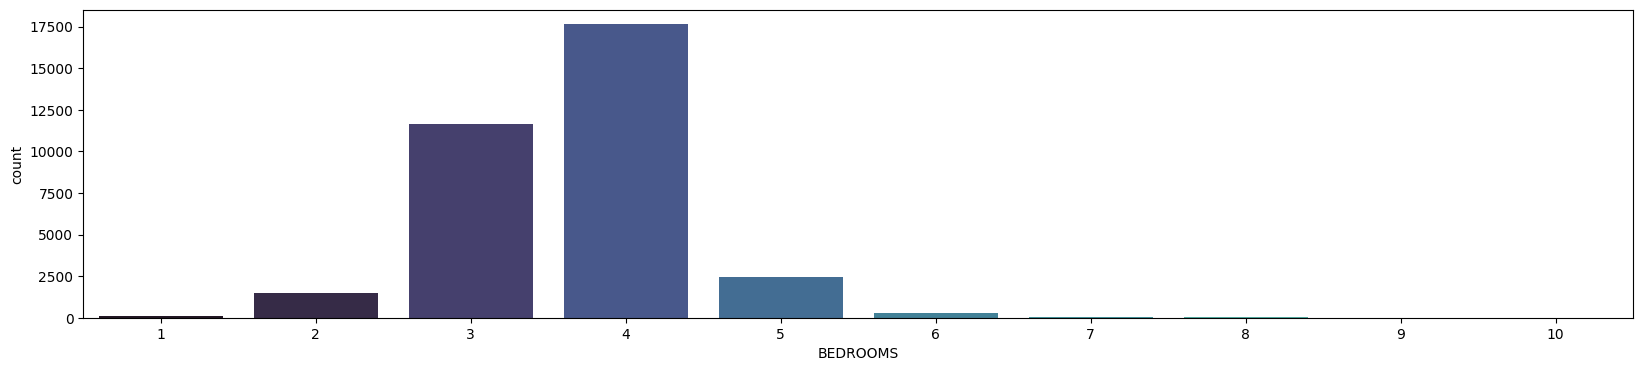

In [85]:
plt.figure(figsize=(20,4))
sns.countplot(x='BEDROOMS', data=df, palette='mako')
plt.xlabel('BEDROOMS')
plt.show()

/tmp/ipykernel_15611/2543537274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BATHROOMS', data=df, palette='mako')


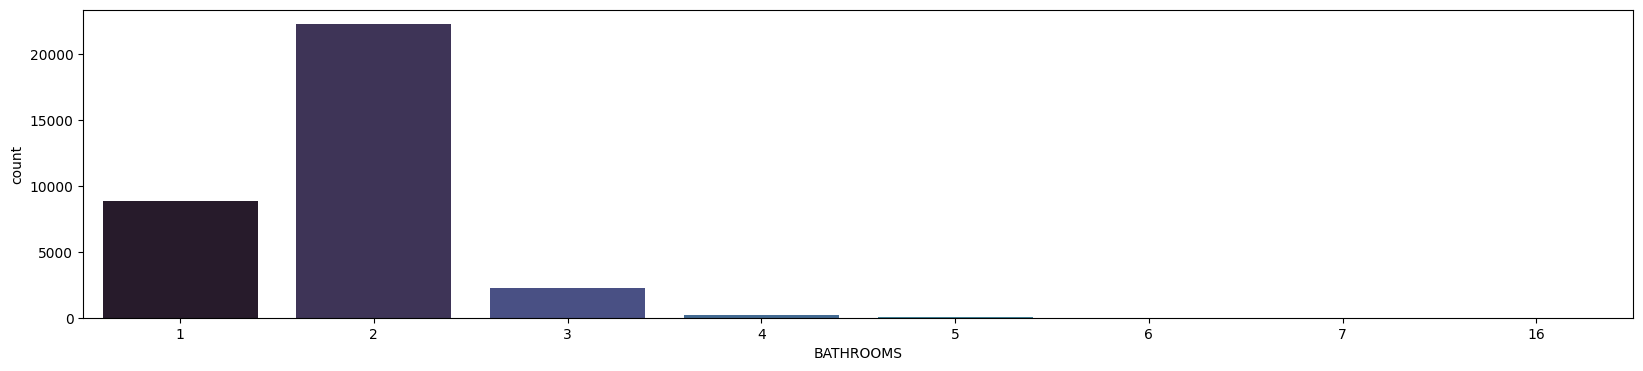

In [86]:
plt.figure(figsize=(20,4))
sns.countplot(x='BATHROOMS', data=df, palette='mako')
plt.xlabel('BATHROOMS')
plt.show()

In [87]:
#sns.set(rc={"figure.figsize":(6,4)})
#sns.displot(df['SUBURB'], kde=True, color='orange', bins=10)

In [88]:
df.duplicated().sum() #birbirinin aynisi olan veri sayisini dondurur

0

In [89]:
df = df.drop_duplicates() #birbiri ile ayni olan satirlari silelim

In [90]:
df.isnull().sum()

PRICE          0
BEDROOMS       0
BATHROOMS      0
LAND_AREA      0
FLOOR_AREA     0
              ..
GARAGE_26.0    0
GARAGE_31.0    0
GARAGE_32.0    0
GARAGE_50.0    0
GARAGE_99.0    0
Length: 702, dtype: int64

In [91]:
#Aykirilik olusturan verileri temizleyelim

In [92]:
# num_cols = df.select_dtypes(include=['int64', 'float64'])

# plt.figure(figsize=(20, 4))

# sns.boxplot(data=num_cols)
# plt.show()

In [93]:
# def remove_outliers(col):
#     sorted(col)
#     Q1, Q3 = col.quantile([0.25, 0.75])

#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)

#     return lower_range, upper_range

In [94]:
# for i in num_cols.columns:
#     lower_range, upper_range = remove_outliers(df[i])
#     df[i] = np.where(df[i] > upper_range, upper_range, df[i])
#     df[i] = np.where(df[i] < lower_range, lower_range, df[i])

In [95]:
# num_cols = df.select_dtypes(include=['int64', 'float64'])
# plt.figure(figsize=(20, 4))

# sns.boxplot(data=num_cols)
# plt.show()

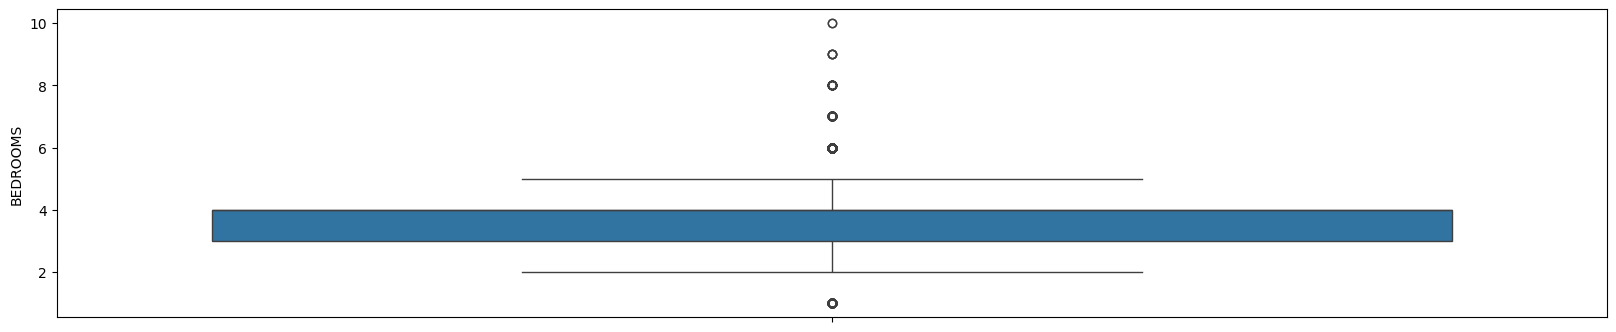

In [96]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df['BEDROOMS'])
plt.show()

In [97]:
#Ciktiya gore verilerin analizi

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Columns: 702 entries, PRICE to GARAGE_99.0
dtypes: float64(4), int64(698)
memory usage: 180.3 MB


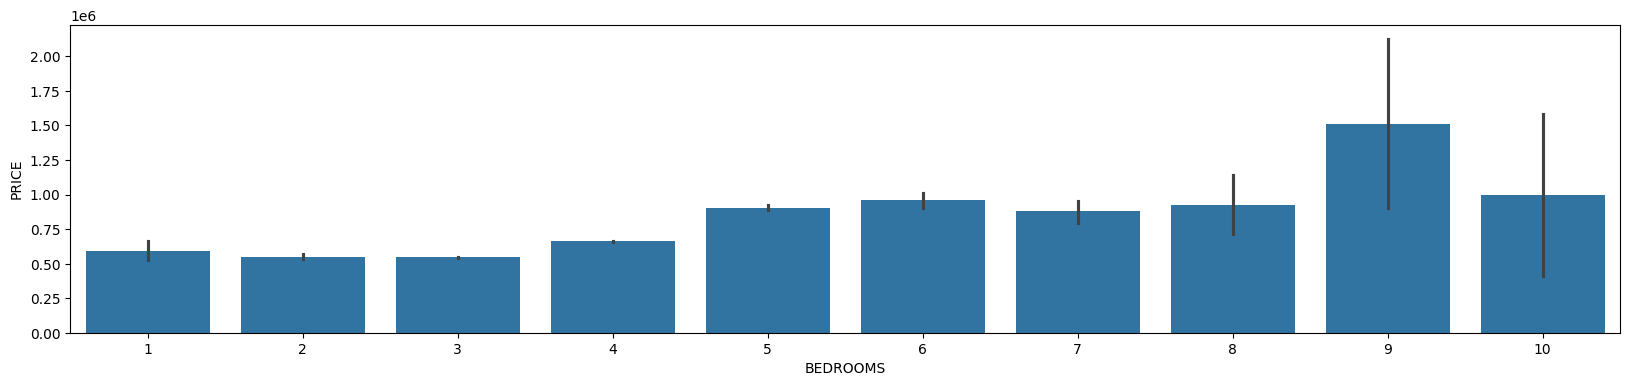

In [99]:
plt.figure(figsize=(20,4))
sns.barplot(x='BEDROOMS', y='PRICE', data=df)
plt.show()

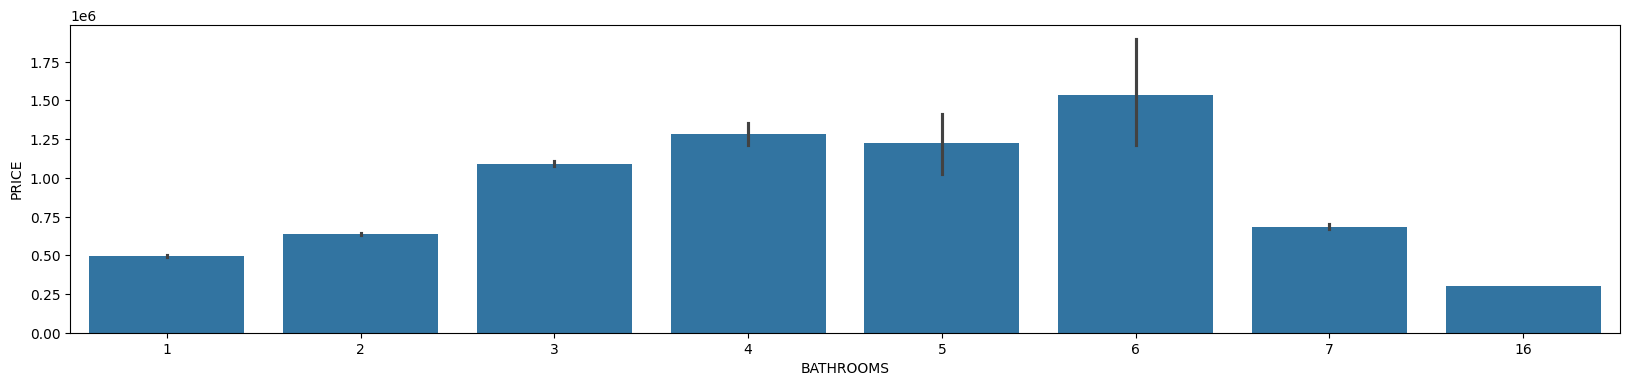

In [100]:
plt.figure(figsize=(20,4))
sns.barplot(x='BATHROOMS', y='PRICE', data=df)
plt.show()

In [101]:
# plt.figure(figsize=(20,4))
# sns.barplot(x='GARAGE', y='PRICE', data=df)
# plt.show()

In [102]:
# num_cols = df.select_dtypes (include= ["int64","float64"])

# def plots (num_cols, variable):
#     plt. figure (figsize=(15,6))
#     plt.subplot (1, 2, 1)
#     #num_cols [variable].hist()
#     sns.distplot (num_cols [variable], kde=True, bins=10)
#     plt.title(variable)
#     plt.subplot (1, 2, 2)
#     stats.probplot (num_cols [variable], dist="norm", plot=pylab)
#     plt.title (variable)
#     plt.show()
# for i in num_cols.columns:
#     plots (num_cols, i)

In [103]:
# num_cols = df.select_dtypes (include= ["int64","float64"])

# fig, ax = plt.subplots(figsize=(18,8))
# sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', ax=ax)

In [104]:
# le = LabelEncoder()
# Label = df.select_dtypes(include=["object"])

# for i in Label:
#     if df[i].nunique() < 3:
#         df[i] = le.fit_transform(df[i])
#     else:
#         df = pd.get_dummies(df, columns=[i], dtype=int)

In [105]:
le = LabelEncoder()
Label = df.select_dtypes(include=["object"])

for i in Label:
    df[i] = le.fit_transform(df[i])

In [106]:
df.head()

,PRICE,BEDROOMS,BATHROOMS,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,...,GARAGE_17.0,GARAGE_18.0,GARAGE_20.0,GARAGE_21.0,GARAGE_22.0,GARAGE_26.0,GARAGE_31.0,GARAGE_32.0,GARAGE_50.0,GARAGE_99.0
0,565000,4,2,600,160,20.0,18300,1800,-32.115900,115.842450,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,351,139,10.0,26900,4900,-32.193470,115.859554,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,719,86,44.0,22600,1900,-32.120578,115.993579,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,651,59,70.0,17900,3600,-31.900547,116.038009,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,466,131,25.0,11200,2000,-31.885790,115.947780,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

In [108]:
# mi_score1 = mutual_info_regression (X, Y)
# mi_score1 = pd. Series (mi_score1)
# mi_score1.index = X. columns
# mi_score1.sort_values (ascending=True)

In [109]:
# mi_score1.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [110]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [111]:
# pc = PCA()

# X = pc.fit_transform(X)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [113]:
def linear_train(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()

    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    return score


In [114]:
linear = linear_train(x_train, x_test, y_train, y_test)


In [115]:
print("linear(R^2): ", linear)

linear:  0.7472813465803121
